In [83]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import random

In [84]:
# The readCSVFile function receives the path to a file, opens it, and returns a list of lines that are data from this file
def readCSVFile(filePath):
    with open(filePath) as file:
        CSVReader = csv.reader(file)
        next(CSVReader)
        rows = [row[1:] for row in CSVReader]
    return rows
rows = readCSVFile("lab_1_train.csv")
x_column = [float(row[0]) for row in rows]
y_column = [float(row[1]) for row in rows]

In [85]:
rows

[['0.0', '20.14901424590337'],
 ['0.010101010101010102', '19.978722729850666'],
 ['0.020202020202020204', '20.234710601834248'],
 ['0.030303030303030304', '20.51751501752847'],
 ['0.04040404040404041', '20.010562068391078'],
 ['0.05050505050505051', '20.030769013925347'],
 ['0.06060606060606061', '20.59497596586434'],
 ['0.07070707070707072', '20.371644560160014'],
 ['0.08080808080808081', '20.020773845835677'],
 ['0.09090909090909091', '20.344586194893974'],
 ['0.10101010101010102', '20.062994894176462'],
 ['0.11111111111111112', '20.082503296151145'],
 ['0.12121212121212122', '20.315012923894052'],
 ['0.13131313131313133', '19.688642189228922'],
 ['0.14141414141414144', '19.765352933074375'],
 ['0.15151515151515152', '20.13434404425801'],
 ['0.16161616161616163', '20.019382987131994'],
 ['0.17171717171717174', '20.437708543212924'],
 ['0.18181818181818182', '20.09122914098'],
 ['0.19191919191919193', '19.960147273437798'],
 ['0.20202020202020204', '20.84373503471687'],
 ['0.212121212

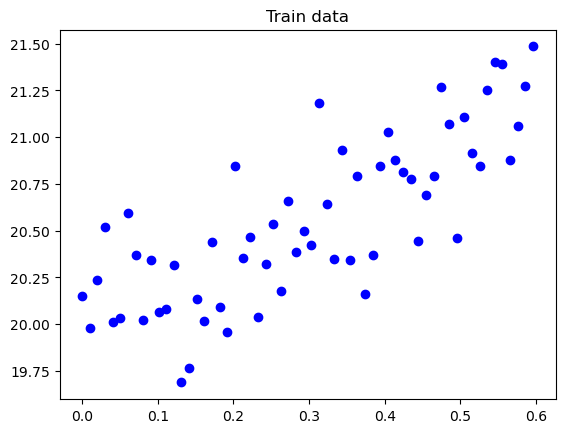

In [86]:
plt.figure()
plt.title("Train data")
plt.scatter(xColumn, yColumn, color='blue', marker='o')
plt.show()

In [87]:
# a function that computes the predicted values for linear regression
def linear_regression_function(beta0, beta1, x):
    return beta0 + np.multiply(beta1, x)

# a function that computes the mean squared error between predicted and actual values
def loss_function(predicted_row, actual_row):
    predicted_array = np.array(predicted_row)
    actual_array = np.array(actual_row)
    return np.mean((predicted_array - actual_array) ** 2)

# a function that performs gradient descent to optimize the linear regression coefficients
def gradient_descent(x_column, y_column, learning_rate=0.01, tolerance=0.000001):
    beta0 = float(np.random.randn(1))
    beta1 = float(np.random.randn(1))
    # Compute the predicted y values and loss for the initial coefficients
    predicted_y = linear_regression_function(beta0, beta1, x_column)
    loss = loss_function(predicted_y, y_column)
    delta = 100
    epoch_number = 0
    # Iterate until the difference between successive loss values is less than tolerance
    while tolerance < delta:
        # Compute the predicted y values and the difference between actual and predicted y values
        predicted_y = linear_regression_function(beta0, beta1, x_column)
        difference_y_values = [(expected - predicted) for (expected, predicted) in zip(y_column, predicted_y)]
        # Compute the derivatives of the loss function with respect to the coefficients
        derivative_beta0 = - (2 / len(difference_y_values)) * np.sum(difference_y_values)
        derivative_beta1 = - (2 / len(difference_y_values)) * np.sum(np.multiply(difference_y_values, x_column))
        # Update the coefficients using the learning rate and the derivatives
        beta0 = beta0 - learning_rate * derivative_beta0
        beta1 = beta1 - learning_rate * derivative_beta1
        # Compute the predicted y values and loss for the updated coefficients
        predicted_y = linear_regression_function(beta0, beta1, x_column)
        current_loss = loss_function(predicted_y, y_column)
        # Compute the difference between the previous and current loss values
        delta = loss - current_loss
        loss = current_loss
        # Print the current epoch number, coefficients, and loss value
        print("%s: beta0 = %s; beta1 = %s; Loss function value = %s;" % (epoch_number, beta0, beta1, current_loss))
        epoch_number += 1
    # Return a dictionary containing the final coefficients
    return {"beta0" : beta0, "beta1" : beta1}

# a function that takes rows of data and trains a linear regression model
def train_linear_regression(rows):
    x_column = np.array([float(row[0]) for row in rows])
    y_column = np.array([float(row[1]) for row in rows])
    return gradient_descent(x_column, y_column)

beta_object = train_linear_regression(rows)
print(beta_object)

0: beta0 = 0.9016041011010297; beta1 = 0.5261238922212572; Loss function value = 380.0438940951533;
1: beta0 = 1.2914277970774495; beta1 = 0.6431725249496334; Loss function value = 363.658395337739;
2: beta0 = 1.6727574565756567; beta1 = 0.7576184711919434; Loss function value = 347.9803617039433;
3: beta0 = 2.0457784712850815; beta1 = 0.8695185668027006; Loss function value = 332.97924649143835;
4: beta0 = 2.4106721863426377; beta1 = 0.9789284070612705; Loss function value = 318.6258219347162;
5: beta0 = 2.7676159886570977; beta1 = 1.0859023737499975; Loss function value = 304.8921222564086;
6: beta0 = 3.1167833933056084; beta1 = 1.1904936616412964; Loss function value = 291.75138917752145;
7: beta0 = 3.4583441280444234; beta1 = 1.2927543044066079; Loss function value = 279.178019780412;
8: beta0 = 3.792464215975012; beta1 = 1.3927351999598379; Loss function value = 267.14751662292485;
9: beta0 = 4.119306056405813; beta1 = 1.490486135247623; Loss function value = 255.63644000648426;
1

In [88]:
test_rows = readCSVFile("lab_1_test.csv")
test_rows

[['0.6060606060606061', '21.068368940767623'],
 ['0.6161616161616162', '21.176625539324085'],
 ['0.6262626262626263', '20.920624760323445'],
 ['0.6363636363636365', '20.91386528550307'],
 ['0.6464646464646465', '21.536687039647553'],
 ['0.6565656565656566', '21.720003321702563'],
 ['0.6666666666666667', '21.31173029685923'],
 ['0.6767676767676768', '21.65459522290296'],
 ['0.686868686868687', '21.482228181251664'],
 ['0.696969696969697', '21.20040346755786'],
 ['0.7070707070707072', '21.52256009579394'],
 ['0.7171717171717172', '21.895754404283228'],
 ['0.7272727272727273', '21.443797642812466'],
 ['0.7373737373737375', '21.944140571491676'],
 ['0.7474747474747475', '20.70902596372257'],
 ['0.7575757575757577', '21.761722266464083'],
 ['0.7676767676767677', '21.561467655824988'],
 ['0.7777777777777778', '21.4658533504158'],
 ['0.787878787878788', '21.603285808718226'],
 ['0.797979797979798', '20.999688921579327'],
 ['0.8080808080808082', '21.550260049810362'],
 ['0.8181818181818182', '

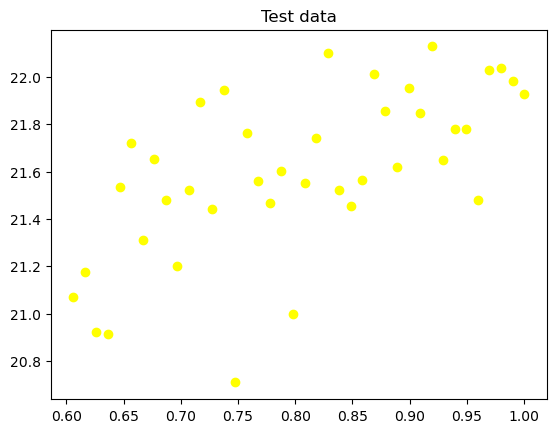

In [89]:
test_x_column = [float(row[0]) for row in test_rows]
test_y_column = [float(row[1]) for row in test_rows]
plt.figure()
plt.title("Test data")
plt.scatter(test_x_column, test_y_column, color='yellow', marker='o')
plt.show()

In [90]:
predicted_y = [linear_regression_function(beta_object["beta0"], beta_object["beta1"], x) for x in test_x_column]
loss = loss_function(predicted_y, test_y_column)
loss

0.07538555862152378

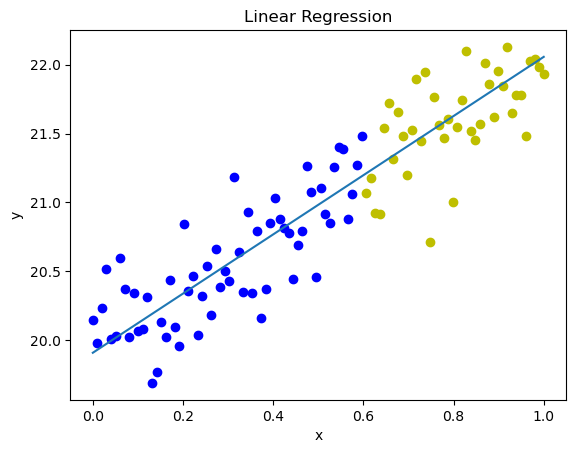

In [91]:
plt.title("Linear Regression")
plt.xlabel('x')
plt.ylabel('y')
x_plot = np.linspace(0, 1, 100)
y_plot = beta_object["beta0"] + np.multiply(beta_object["beta1"], x_plot)
plt.plot(x_column, y_column, 'bo', test_x_column, test_y_column, 'yo', x_plot, y_plot)